# Q2. Lasso Regression

After you have successfully finished Q1, in this section, we will try to implement Lasso Regression.


## Tasks:
#### Your answer for task 1 and 2 should be written in the report. For Task 3, write the code for visualization and submit your .ipynb.

1. In the below code block for training, describe the code line by line. (40pt)

2. Lasso Regression introduces a L1 regularization term. Describe how it works differently compared to a simple linear regressor in Q1, and what to expect for learnable coefficients by regularizing it. (30pt)

3. Visualize the final result by plotting the data points and the fitted line in the each feature dimension. Provide the completed graph with labeled axes and a legend. (30pt)

###Expected Output:

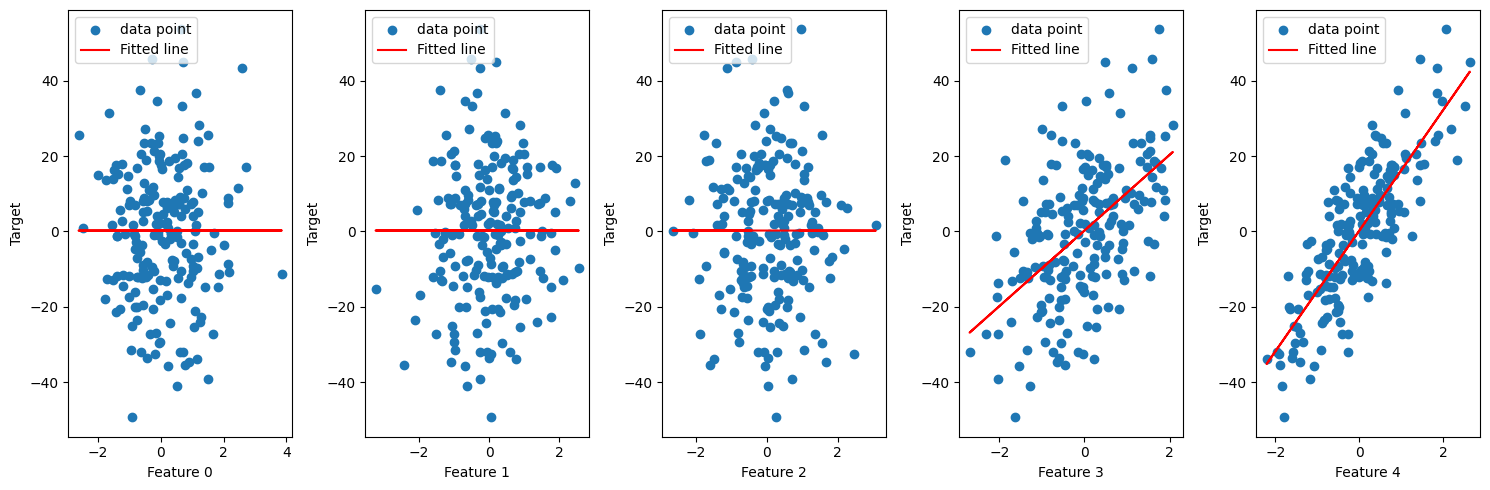

### Prepare package, parameters, data

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
np.random.seed(42)

lr = 1e-2
tot_iter = 1000

x, y, z = datasets.make_regression(
        n_samples=200, n_features=5, noise=2, n_informative=2, random_state=42, coef=True)

w = np.zeros(x.shape[1])
b = np.zeros(1)

alpha = 1

print("GT coefficients: ", *z)

GT coefficients:  0.0 0.0 0.0 10.456784033440025 16.748258225906977


## Training Lasso Regression

In [ ]:
for it in range(tot_iter):
    pred = x @ w + b
    mse = np.mean((pred - y)**2) + alpha * np.mean(np.abs(w))

    dw = np.dot(x.T, (2 * (pred - y))) / x.shape[0] + alpha * np.sign(w)
    db = np.mean(2 * (pred - y))

    w -= lr * dw
    b -= lr * db

pred = x @ w + b
mse = np.mean((pred - y)**2)
print("Mean Square Error {}".format(mse))
print("weight:{}, bias:{}".format(w,b))

Mean Square Error 4.775219280661165
weight:[ 1.08563827e-02  6.50804797e-03 -6.47081095e-03  1.00493865e+01
  1.60254082e+01], bias:[0.24735817]


## Visualize

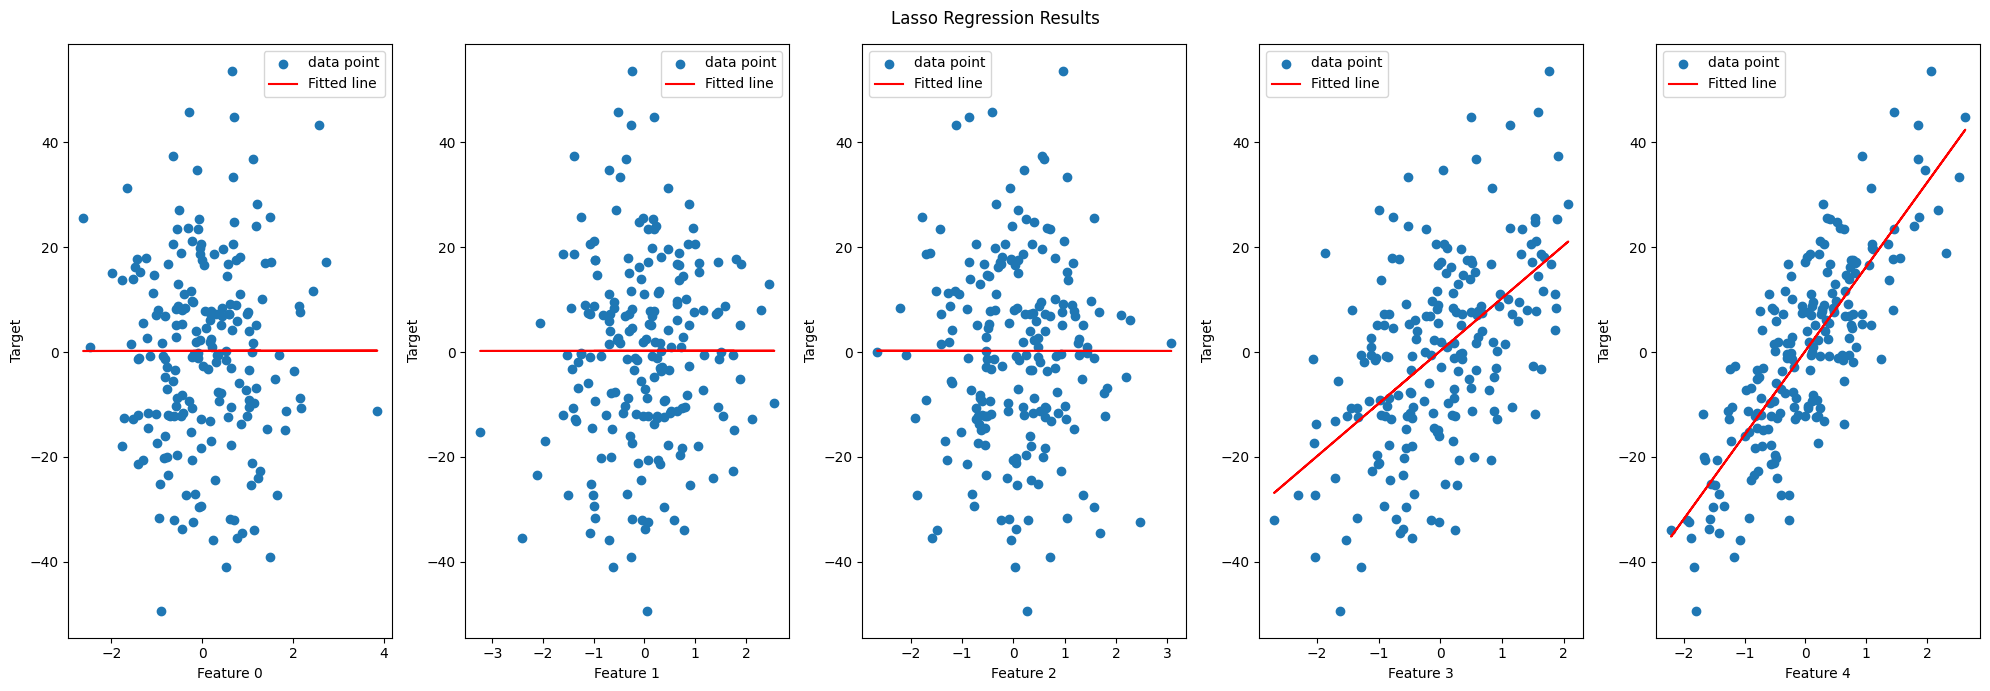

In [ ]:
fig, axs = plt.subplots(1, x.shape[1], figsize=(20, 7))
fig.suptitle('Lasso Regression Results')

for i in range(x.shape[1]):
    axs[i].scatter(x[:, i], y, label='data point')
    axs[i].plot(x[:, i], x[:, i] * w[i] + b, color='red', label='Fitted line')
    axs[i].set_xlabel('Feature ' + str(i))
    axs[i].set_ylabel('Target')
    axs[i].legend()

plt.tight_layout()
plt.show()